# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv("cleanmath.csv")
df

,Unnamed: 0,STU_ID,X2SEX,X2RACE,X2SESQ5,X2TXMQUINT,X2MTHID,X2MTHUTI,X2MTHEFF,X2MTHINT_R
0,0,10001,1,8,5,5,0.16,1.21,1.73,-0.21
1,1,10002,2,8,2,4,-0.42,-0.50,-0.70,-0.60
2,2,10003,2,3,5,4,-1.54,-0.90,-0.56,-1.39
3,3,10007,2,8,4,2,0.12,0.38,-1.09,-0.47
4,4,10009,1,8,4,5,0.70,-0.50,0.32,-1.25
...,...,...,...,...,...,...,...,...,...,...
16213,16213,35200,1,8,5,5,1.82,0.80,1.73,2.17
16214,16214,35203,2,5,1,3,-0.42,1.21,0.11,-0.60
16215,16215,35204,2,8,3,3,-0.42,1.21,1.73,0.31
16216,16216,35205,1,8,5,3,-1.54,-3.94,-1.30,-1.89


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

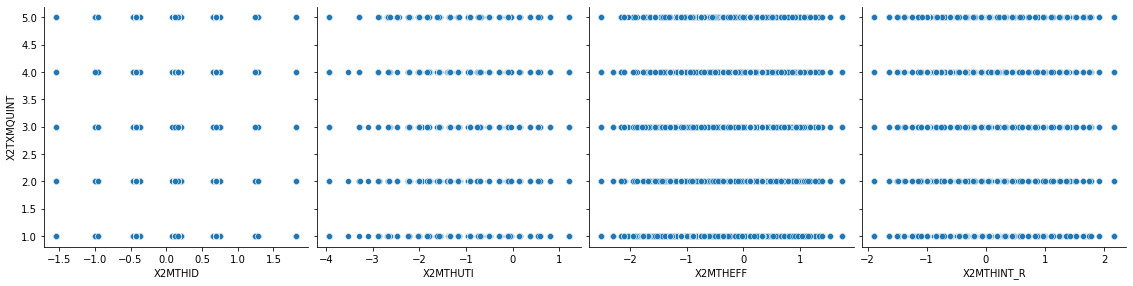

In [5]:
sns.pairplot(df, x_vars=['X2MTHID', 'X2MTHUTI','X2MTHEFF', 'X2MTHINT_R'], 
             y_vars='X2TXMQUINT', height=4, aspect=1, kind='scatter')
plt.show()

#Aliya Question 1: I clearly see correlations in the heat map. Why can't I visualize them in the scatterplots?

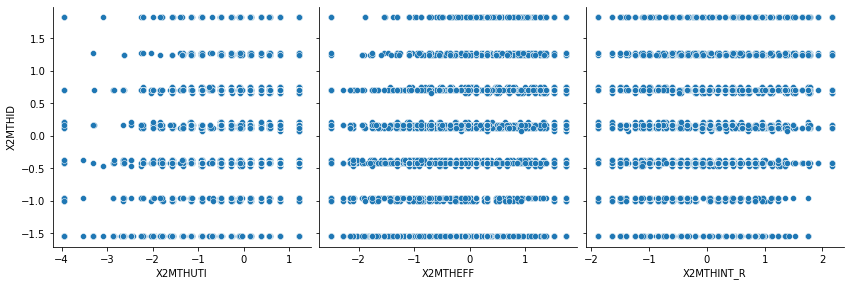

In [6]:
sns.pairplot(df, x_vars=['X2MTHUTI','X2MTHEFF', 'X2MTHINT_R'], 
             y_vars='X2MTHID', height=4, aspect=1, kind='scatter')
plt.show()

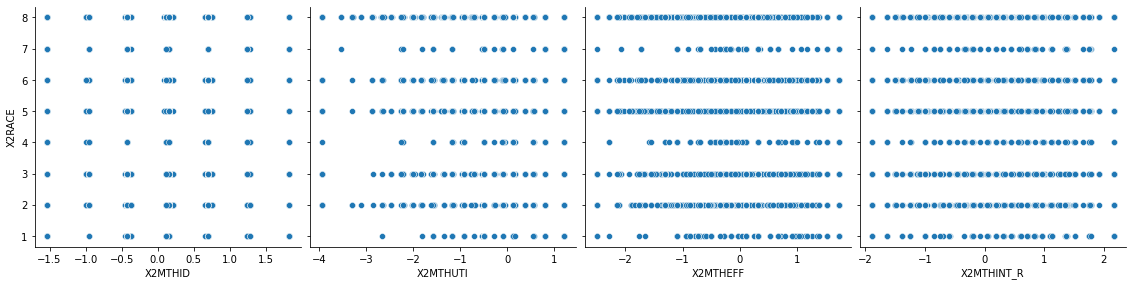

In [7]:
sns.pairplot(df, x_vars=['X2MTHID','X2MTHUTI','X2MTHEFF', 'X2MTHINT_R'], 
             y_vars='X2RACE', height=4, aspect=1, kind='scatter')
plt.show()

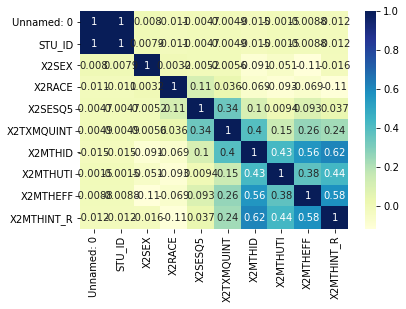

In [8]:

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#0.62 = identity and interest *
#0.56 = identity and efficacy *
#0.43 = identity and utility
#0.40 = identity and score

#0.34 = score and SES
#0.58 = efficacy and interest *

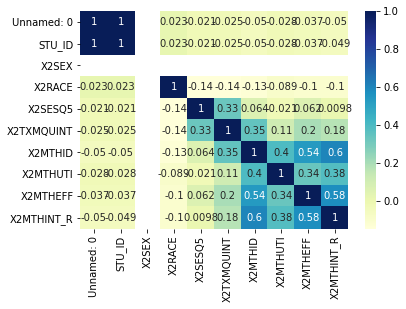

In [10]:
#check out same thing in female non-dominant population

df_fnondom = df[(df['X2SEX']==2) & (df['X2RACE'] != 8)]
df_fnondom

sns.heatmap(df_fnondom.corr(), cmap="YlGnBu", annot = True)
plt.show()

#No significant difference bw total and female non-dominant

#0.62 = identity and interest (0.6)
#0.56 = identity and efficacy (0.54)
#0.43 = identity and utility (0.4)
#0.40 = identity and score (0.35)

#0.34 = score and SES (0.33)
#0.58 = efficacy and interest (0.58)

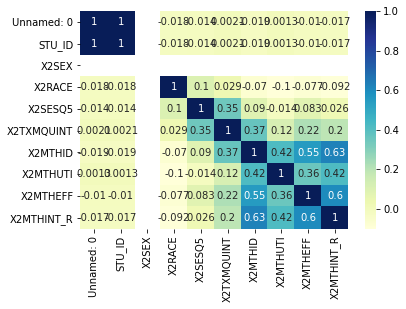

In [19]:
df_Girls = df[(df['X2SEX']==2)]
df_Girls

sns.heatmap(df_Girls.corr(), cmap="YlGnBu", annot = True)
plt.show()

#0.62 = identity and interest (0.63)
#0.56 = identity and efficacy (0.55)
#0.43 = identity and utility (0.42)
#0.40 = identity and score (0.37)

#0.34 = score and SES (0.35)
#0.58 = efficacy and interest (0.5)

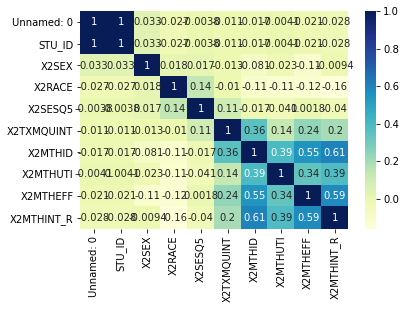

In [21]:
df_lowSES = df[(df['X2SESQ5']<3)]
df_lowSES


sns.heatmap(df_lowSES.corr(), cmap="YlGnBu", annot = True)
plt.show()

#Nothing significantly different


In [ ]:
#results: Based on these correlations and me not finding anything very different in a specific population,
#I hypothesized that interest and efficacy contribute greatly to identity.

#0.62 = identity and interest *
#0.56 = identity and efficacy *
#0.58 = efficacy and interest *

#Now I want to see if a model would show that. (y=identity)

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [23]:
X = df['X2MTHINT_R']
y = df['X2MTHID']

#'X2MTHEFF'

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [25]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [26]:
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const         0.069459
X2MTHINT_R    0.615343
dtype: float64

In [27]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                X2MTHID   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     6767.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:19:14   Log-Likelihood:                -13663.
No. Observations:               11352   AIC:                         2.733e+04
Df Residuals:                   11350   BIC:                         2.734e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0695      0.008      9.177      0.000       0.055       0.084
X2MTHINT_R     0.6153      0.007     82.263      0.000       0.601       0.630
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.070
Skew:                           0.023   Prob(JB):                        0.586
Kurtosis:                       3.010   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

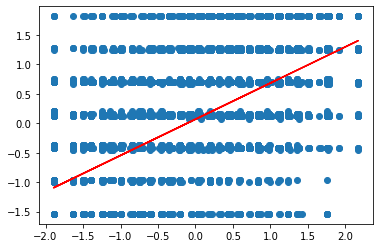

In [29]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.069459 + 0.615343*X_train, 'r')
plt.show()


#Aliya Question 2: The visualization of the regression line is horrible too. I need help interpreting it.

In [51]:
#Aliya Question 3: I want to run a multiple linear regression because I know two variables are affecting my y. 
#I wasn't able to move beyond my errors.

#https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(df[['X2MTHINT_R', 'X2MTHEFF'], df['X2MTHID']])

# get the slope and intercept of the line best fit.
print(mlr.intercept_)
# 

print(mlr.coef_)
# 

#Would defining them help somehow?
#X_var = df[['X2MTHINT_R', 'X2MTHEFF']]
#y_var = df['X2MTHID'] # dependent variable

SyntaxError: invalid syntax (<ipython-input-51-80ecc5eaab92>, line 1)

## Error Terms

Finally, plot your error terms!

C:\Users\fhfk6.UM-AD\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


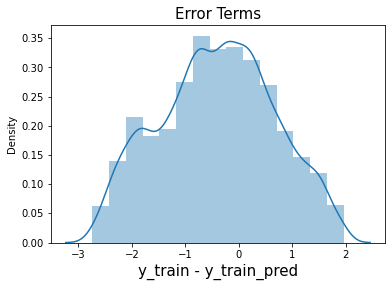

In [48]:
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

ValueError: x and y must be the same size

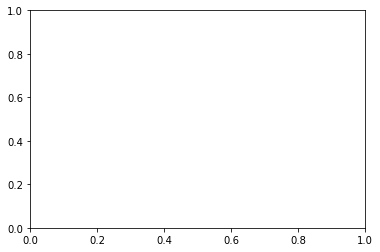

In [50]:
#Aliya Question 4: I wasn't able to move beyond my errors.

# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.638
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really

In [ ]:
#My R-squared value is 0.374. 

#Considering the high correlation among these three variables, I think a multiple linear regression would be effective.
#0.62 = identity and interest *
#0.56 = identity and efficacy *
#0.58 = efficacy and interest *

#Yes, my plot of error terms was a bell curve.
